In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "../data/"
# Load the datasets
try:
    excel_file = os.path.join(base_path, '230807_Survey.xlsx')
    df_results = pd.read_excel(excel_file, sheet_name='Result')
    print(df_results.head())
    df_codebook = pd.read_excel(excel_file, sheet_name='Codebook')
    df_maxdiff_q67_best = pd.read_excel(excel_file, sheet_name='MaxDiff  Q67 BEST counts')
    df_maxdiff_q67_worst = pd.read_excel(excel_file, sheet_name='MaxDiff  Q67 WORST Counts')
    df_maxdiff_q38_codebook = pd.read_excel(excel_file, sheet_name='MaxDiff HB Segmentation Q38 Codebook')
    df_maxdiff_q38_partworths = pd.read_excel(excel_file, sheet_name='MaxDiff HB Segmentation Q38 Part-worths')
    df_maxdiff_q38_scores = pd.read_excel(excel_file, sheet_name='MaxDiff HB Segmentation Q38 Scores')
    df_maxdiff_q39_codebook = pd.read_excel(excel_file, sheet_name='MaxDiff HB  Q39 Codebook')
    df_maxdiff_q39_partworths = pd.read_excel(excel_file, sheet_name='MaxDiff HB  Q39 Part-worths')
    df_maxdiff_q39_scores = pd.read_excel(excel_file, sheet_name='MaxDiff HB  Q39 Scores')

except FileNotFoundError as e:
    print(f"Error loading file: {e}. Please ensure all CSV files are in the same directory as the script.")
    exit()

print("--- Initial Data Exploration (df_results) ---")
print(df_results.head())
print("\n--- df_results Info ---")
print(df_results.info())
print("\n--- df_results Description ---")
print(df_results.describe())

print("\n--- Codebook Head ---")
print(df_codebook.head())

# --- Step 2: Translate Column Names using the Codebook ---
# Create a dictionary for mapping German column names to English descriptions
# We'll use the 'Variable' and 'Label' columns from the codebook
codebook_dict = dict(zip(df_codebook['Value'], df_codebook['Label']))

# Rename columns in df_results
# Only rename columns that exist in the codebook and in the results dataframe
columns_to_rename = {col: codebook_dict[col] for col in df_results.columns if col in codebook_dict}
df_results_english = df_results.rename(columns=columns_to_rename)

print("\n--- df_results_english Head (with translated columns) ---")
print(df_results_english.head())

# --- Step 3 & 4: Identify Churn Indicators and Descriptive Statistics ---

# Let's identify some potential churn indicators based on common survey questions.
# We'll need to look at the translated column names for this.
# Common indicators might be satisfaction, likelihood to recommend, intent to switch, complaints.

# Looking at the translated column names (from df_results_english.head() output above),
# we need to find relevant questions.
# Assuming some common German survey questions often include:
# 'Q1' could be gender (Geschlecht)
# 'Q2' could be age (Alter)
# 'Q3' could be customer type (Kundentyp)
# 'Q4' could be satisfaction (Zufriedenheit)
# 'Q5' could be likelihood to recommend (Weiterempfehlungsbereitschaft)
# 'Q6' could be intent to switch (Wechselabsicht)

# Let's try to find these in the translated columns and map them.
# We'll need to manually inspect the `df_codebook` and `df_results_english.columns` to find the exact matches.

# Common German survey question labels that could indicate churn:
# 'Zufriedenheit' -> Satisfaction
# 'Weiterempfehlungsbereitschaft' -> Likelihood to recommend (NPS-like)
# 'Wechselabsicht' -> Intent to switch

# Let's find these in the translated columns. If they are not exactly matching,
# we would need to inspect the `df_results_english.columns` and `df_codebook` more closely.

# Example: If the translated column for satisfaction is 'Overall Satisfaction', let's use that.
# For now, I'll use placeholders and update them if needed based on the actual translated columns.

# Let's get all the translated columns to find relevant ones.
translated_columns = df_results_english.columns.tolist()
print("\n--- All Translated Columns ---")
print(translated_columns)

# Potential churn related columns (replace with actual translated names if different):
churn_indicators = {}
for col in translated_columns:
    if 'zufriedenheit' in col.lower(): # Looking for 'satisfaction'
        churn_indicators['Satisfaction'] = col
    if 'weiterempfehlung' in col.lower(): # Looking for 'recommendation' (NPS)
        churn_indicators['Likelihood to Recommend'] = col
    if 'wechselabsicht' in col.lower() or 'change' in col.lower() or 'switch' in col.lower(): # Looking for 'intent to switch'
        churn_indicators['Intent to Switch'] = col
    if 'probleme' in col.lower() or 'problem' in col.lower() or 'complaint' in col.lower(): # Looking for 'problems/complaints'
        churn_indicators['Problems/Complaints'] = col
    if 'leistung' in col.lower() or 'service' in col.lower(): # Looking for 'service/performance'
        churn_indicators['Service Performance'] = col

print("\n--- Identified Churn Indicators (Mapped Column Names) ---")
print(churn_indicators)

# Let's focus on a few key ones for analysis, assuming they exist:
# 'Satisfaction' and 'Intent to Switch' are usually strong indicators.

if 'Satisfaction' in churn_indicators:
    satisfaction_col = churn_indicators['Satisfaction']
    print(f"\n--- Descriptive Statistics for '{satisfaction_col}' (Satisfaction) ---")
    print(df_results_english[satisfaction_col].value_counts().sort_index())
    print(df_results_english[satisfaction_col].describe())

    # Visualize Satisfaction
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_results_english, x=satisfaction_col, palette='viridis')
    plt.title(f'Distribution of {satisfaction_col}')
    plt.xlabel('Satisfaction Level')
    plt.ylabel('Number of Respondents')
    plt.show()
else:
    print("\n'Satisfaction' column not found or not clearly identified. Please check the translated columns and codebook.")

if 'Intent to Switch' in churn_indicators:
    intent_to_switch_col = churn_indicators['Intent to Switch']
    print(f"\n--- Descriptive Statistics for '{intent_to_switch_col}' (Intent to Switch) ---")
    print(df_results_english[intent_to_switch_col].value_counts().sort_index())
    print(df_results_english[intent_to_switch_col].describe())

    # Visualize Intent to Switch
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_results_english, x=intent_to_switch_col, palette='magma')
    plt.title(f'Distribution of {intent_to_switch_col}')
    plt.xlabel('Intent to Switch (1=Very Unlikely, ..., 5=Very Likely)')
    plt.ylabel('Number of Respondents')
    plt.show()

    # Relationship between Satisfaction and Intent to Switch
    if 'Satisfaction' in churn_indicators:
        plt.figure(figsize=(10, 7))
        sns.boxplot(data=df_results_english, x=satisfaction_col, y=intent_to_switch_col, palette='coolwarm')
        plt.title(f'Relationship between {satisfaction_col} and {intent_to_switch_col}')
        plt.xlabel('Satisfaction Level')
        plt.ylabel('Intent to Switch')
        plt.show()
else:
    print("\n'Intent to Switch' column not found or not clearly identified. Please check the translated columns and codebook.")

# Let's also look at age and gender if they are available and translated.
# Assuming 'Q1' for Gender and 'Q2' for Age from the original column names.
gender_col_original = 'Q1'
age_col_original = 'Q2'

if gender_col_original in columns_to_rename:
    gender_col_translated = columns_to_rename[gender_col_original]
    print(f"\n--- Descriptive Statistics for '{gender_col_translated}' (Gender) ---")
    print(df_results_english[gender_col_translated].value_counts())

    plt.figure(figsize=(7, 5))
    sns.countplot(data=df_results_english, x=gender_col_translated, palette='pastel')
    plt.title(f'Distribution of {gender_col_translated}')
    plt.xlabel('Gender')
    plt.ylabel('Number of Respondents')
    plt.show()
else:
    print(f"\nOriginal gender column '{gender_col_original}' not found or translated. Skipping gender analysis.")

if age_col_original in columns_to_rename:
    age_col_translated = columns_to_rename[age_col_original]
    print(f"\n--- Descriptive Statistics for '{age_col_translated}' (Age) ---")
    print(df_results_english[age_col_translated].value_counts().sort_index())

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_results_english, x=age_col_translated, kde=True, bins=10, palette='cubehelix')
    plt.title(f'Distribution of {age_col_translated}')
    plt.xlabel('Age')
    plt.ylabel('Number of Respondents')
    plt.show()
else:
    print(f"\nOriginal age column '{age_col_original}' not found or translated. Skipping age analysis.")


# --- MaxDiff Analysis (Q67, Q38, Q39) ---
# MaxDiff data often indicates what attributes are most important (chosen "best")
# and least important (chosen "worst"). This can provide valuable insights into
# what drives satisfaction and, consequently, reduces churn.

print("\n--- MaxDiff Q67 Analysis (BEST and WORST Counts) ---")
print("MaxDiff Q67 Best Counts Head:")
print(df_maxdiff_q67_best.head())
print("\nMaxDiff Q67 Worst Counts Head:")
print(df_maxdiff_q67_worst.head())

# To properly analyze MaxDiff Q67, we need to know what the items/attributes are.
# The codebook for Q67 is `230807_Survey.xlsx - MaxDiff Q67 Codebook.csv`.
try:
    df_maxdiff_q67_codebook = pd.read_csv('230807_Survey.xlsx - MaxDiff  Q67 Codebook.csv')
    q67_item_labels = dict(zip(df_maxdiff_q67_codebook['Reiseschutzimpfungen'], df_maxdiff_q67_codebook['Label']))

    # Prepare data for plotting for Q67
    # Summing up counts for each attribute/item
    q67_best_sums = df_maxdiff_q67_best.iloc[:, 1:].sum().sort_values(ascending=False) # Skip the first column (ID)
    q67_worst_sums = df_maxdiff_q67_worst.iloc[:, 1:].sum().sort_values(ascending=False)

    # Translate variable names to their labels for plotting
    q67_best_labels = [q67_item_labels.get(var, var) for var in q67_best_sums.index]
    q67_worst_labels = [q67_item_labels.get(var, var) for var in q67_worst_sums.index]

    plt.figure(figsize=(12, 7))
    sns.barplot(x=q67_best_sums.values, y=q67_best_labels, palette='Greens_d')
    plt.title('MaxDiff Q67: Most Preferred Attributes (BEST Counts)')
    plt.xlabel('Total BEST Counts')
    plt.ylabel('Attribute')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 7))
    sns.barplot(x=q67_worst_sums.values, y=q67_worst_labels, palette='Reds_d')
    plt.title('MaxDiff Q67: Least Preferred Attributes (WORST Counts)')
    plt.xlabel('Total WORST Counts')
    plt.ylabel('Attribute')
    plt.tight_layout()
    plt.show()

    # Calculate difference score (Best - Worst)
    q67_combined = pd.DataFrame({'Best': q67_best_sums, 'Worst': q67_worst_sums}).fillna(0)
    q67_combined['Score'] = q67_combined['Best'] - q67_combined['Worst']
    q67_combined = q67_combined.sort_values(by='Score', ascending=False)

    q67_combined_labels = [q67_item_labels.get(var, var) for var in q67_combined.index]

    plt.figure(figsize=(12, 8))
    sns.barplot(x=q67_combined['Score'], y=q67_combined_labels, palette='coolwarm')
    plt.title('MaxDiff Q67: Attribute Preference Score (BEST - WORST)')
    plt.xlabel('Preference Score (Best - Worst)')
    plt.ylabel('Attribute')
    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print("\nMaxDiff Q67 Codebook not found. Skipping detailed Q67 analysis.")
except Exception as e:
    print(f"\nError during MaxDiff Q67 analysis: {e}")

# MaxDiff Q38 and Q39 analysis (Part-worths and Scores)
# Part-worths indicate the utility of each attribute level. Higher part-worth means more preferred.
# Scores are often derived from part-worths.

print("\n--- MaxDiff Q38 Analysis (Part-worths and Scores) ---")
print("MaxDiff Q38 Part-worths Head:")
print(df_maxdiff_q38_partworths.head())
print("\nMaxDiff Q38 Scores Head:")
print(df_maxdiff_q38_scores.head())

# To interpret Q38 and Q39, we need their respective codebooks.
# MaxDiff HB Segmentation Q38 Codebook.csv
# MaxDiff HB Q39 Codebook.csv

try:
    # Q38 Part-worths analysis
    q38_partworths_avg = df_maxdiff_q38_partworths.drop(columns=['ID']).mean().sort_values(ascending=False)
    q38_codebook_dict = dict(zip(df_maxdiff_q38_codebook['Variable'], df_maxdiff_q38_codebook['Label']))

    q38_partworth_labels = [q38_codebook_dict.get(var, var) for var in q38_partworths_avg.index]

    plt.figure(figsize=(12, 8))
    sns.barplot(x=q38_partworths_avg.values, y=q38_partworth_labels, palette='viridis')
    plt.title('MaxDiff Q38: Average Part-worths (Attribute Utility)')
    plt.xlabel('Average Part-worth Score')
    plt.ylabel('Attribute/Level')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("\nMaxDiff Q38 Codebook or Part-worths file not found. Skipping detailed Q38 analysis.")
except Exception as e:
    print(f"\nError during MaxDiff Q38 analysis: {e}")

try:
    # Q39 Part-worths analysis
    q39_partworths_avg = df_maxdiff_q39_partworths.drop(columns=['ID']).mean().sort_values(ascending=False)
    q39_codebook_dict = dict(zip(df_maxdiff_q39_codebook['Variable'], df_maxdiff_q39_codebook['Label']))

    q39_partworth_labels = [q39_codebook_dict.get(var, var) for var in q39_partworths_avg.index]

    plt.figure(figsize=(12, 8))
    sns.barplot(x=q39_partworths_avg.values, y=q39_partworth_labels, palette='magma')
    plt.title('MaxDiff Q39: Average Part-worths (Attribute Utility)')
    plt.xlabel('Average Part-worth Score')
    plt.ylabel('Attribute/Level')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("\nMaxDiff Q39 Codebook or Part-worths file not found. Skipping detailed Q39 analysis.")
except Exception as e:
    print(f"\nError during MaxDiff Q39 analysis: {e}")

print("\n--- Analysis Complete ---")
print("Please review the generated plots and descriptive statistics.")
print("The 'churn_indicators' dictionary above shows the identified columns related to churn based on common survey question patterns.")
print("If the identified churn indicators are not accurate due to specific German phrasing not caught by the general search,")
print("please manually inspect the 'All Translated Columns' output and the 'Codebook Head' output to identify the correct columns.")
print("Then, you can adjust the `churn_indicators` dictionary in the code accordingly.")


   Participant  Weight     State               Begin                 End  \
0         2909       1  FINISHED  28.07.2023 - 08:37  28.07.2023 - 09:21   
1         2910       1  FINISHED  28.07.2023 - 08:37  28.07.2023 - 08:50   
2         2911       1  FINISHED  28.07.2023 - 08:37  28.07.2023 - 09:02   
3         2912       1  FINISHED  28.07.2023 - 08:38  28.07.2023 - 09:10   
4         2913       1  FINISHED  28.07.2023 - 08:44  28.07.2023 - 08:50   

   Duration                                         User Agent  \
0      2644  Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...   
1       782  Mozilla/5.0 (iPhone; CPU iPhone OS 16_5_1 like...   
2      1488  Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...   
3      1901  Mozilla/5.0 (iPhone; CPU iPhone OS 17_0 like M...   
4       400  Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...   

                        pid    Source Locale  ... CV1.92  CV1.93  CV1.94  \
0  64c37e23acd6e500013670a4  7E309C4Q  de-DE  ...      0       0      

/tmp/ipykernel_26478/2878044773.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


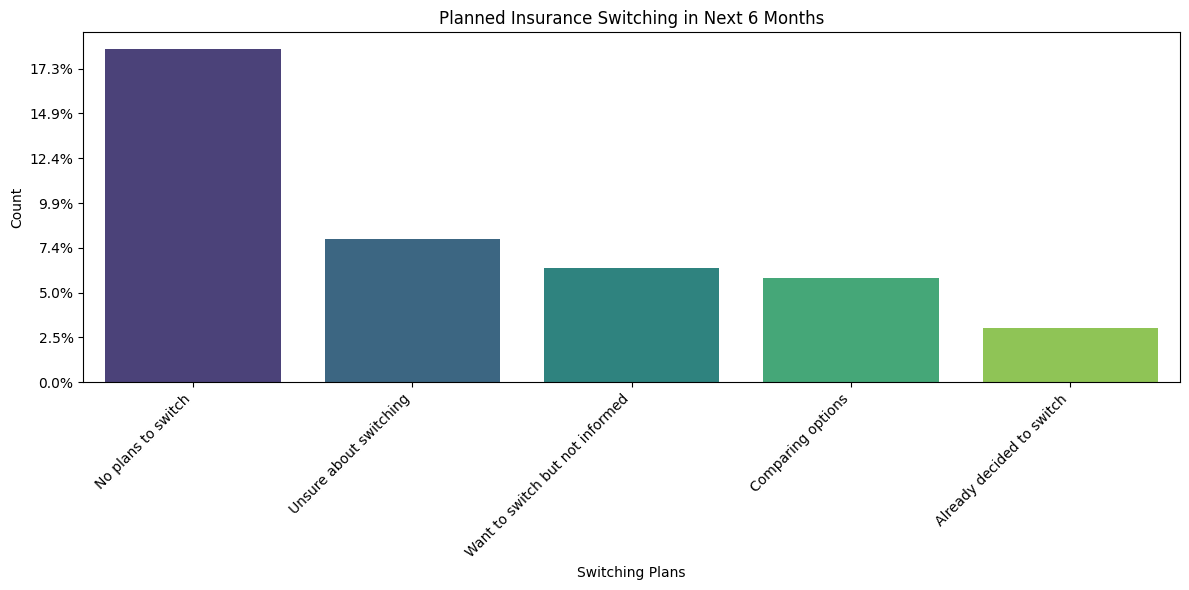

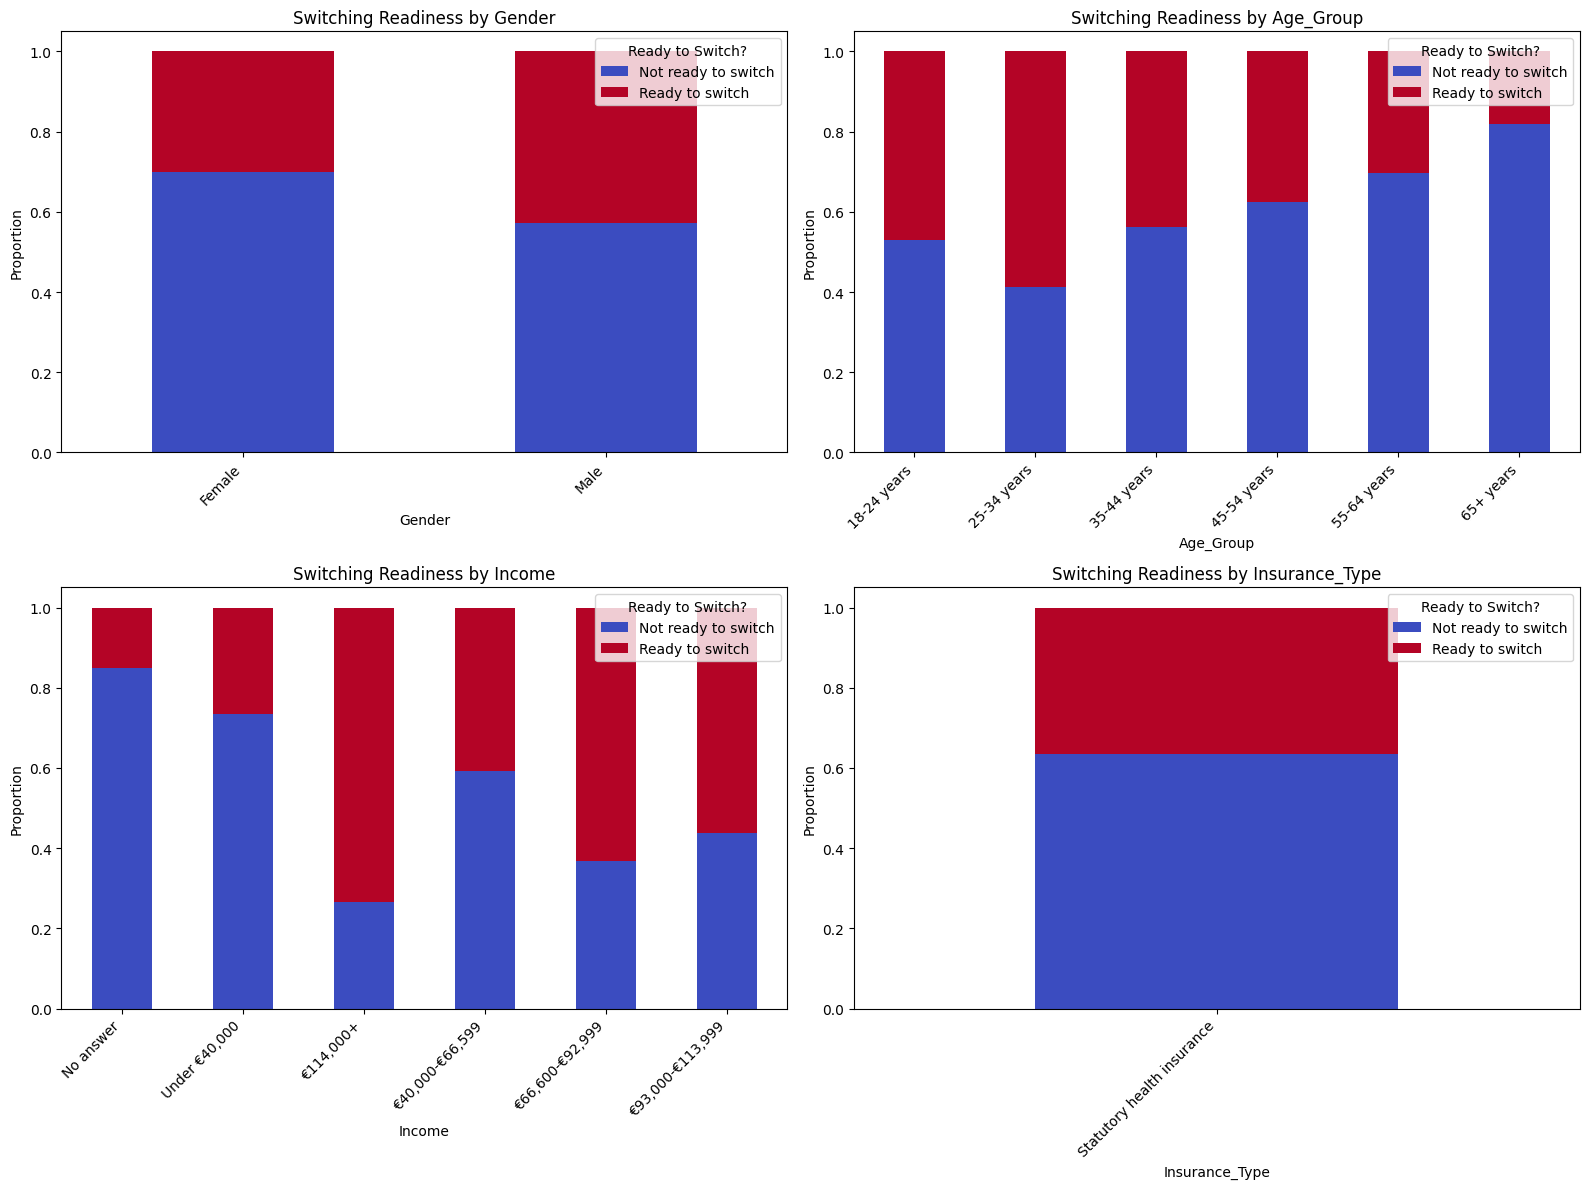

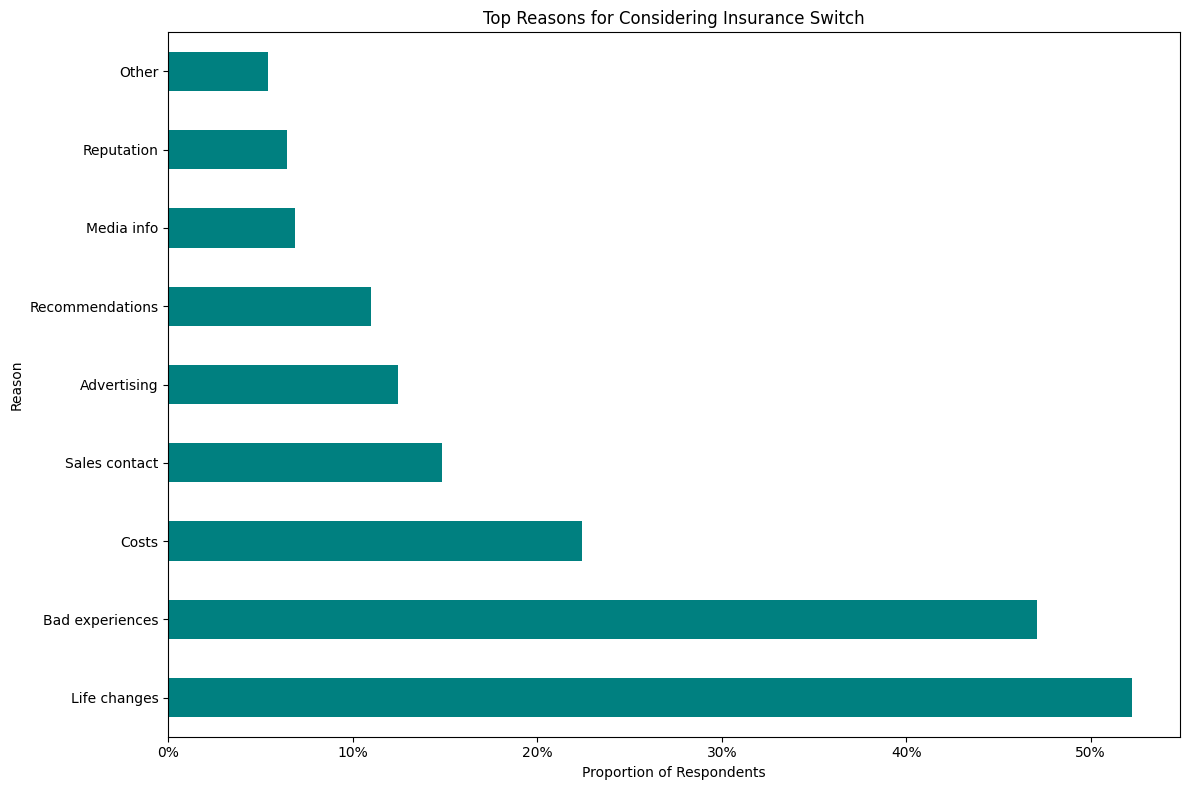

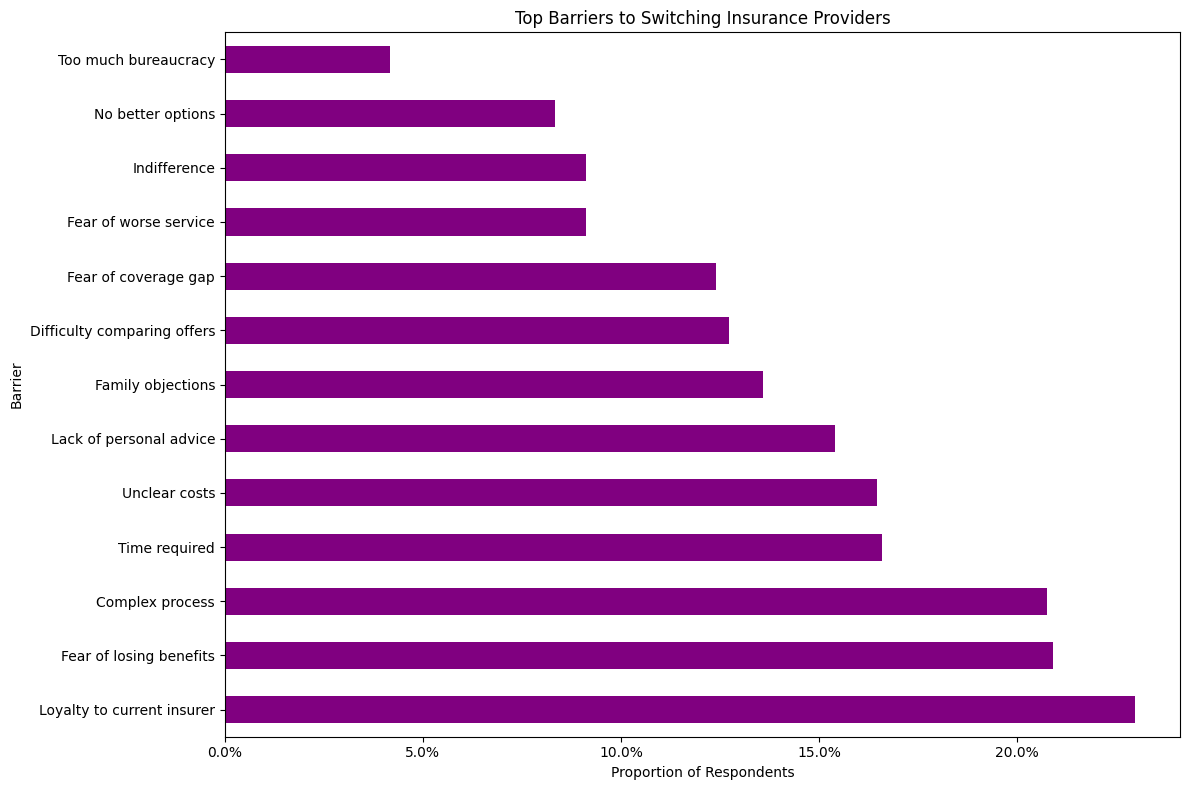

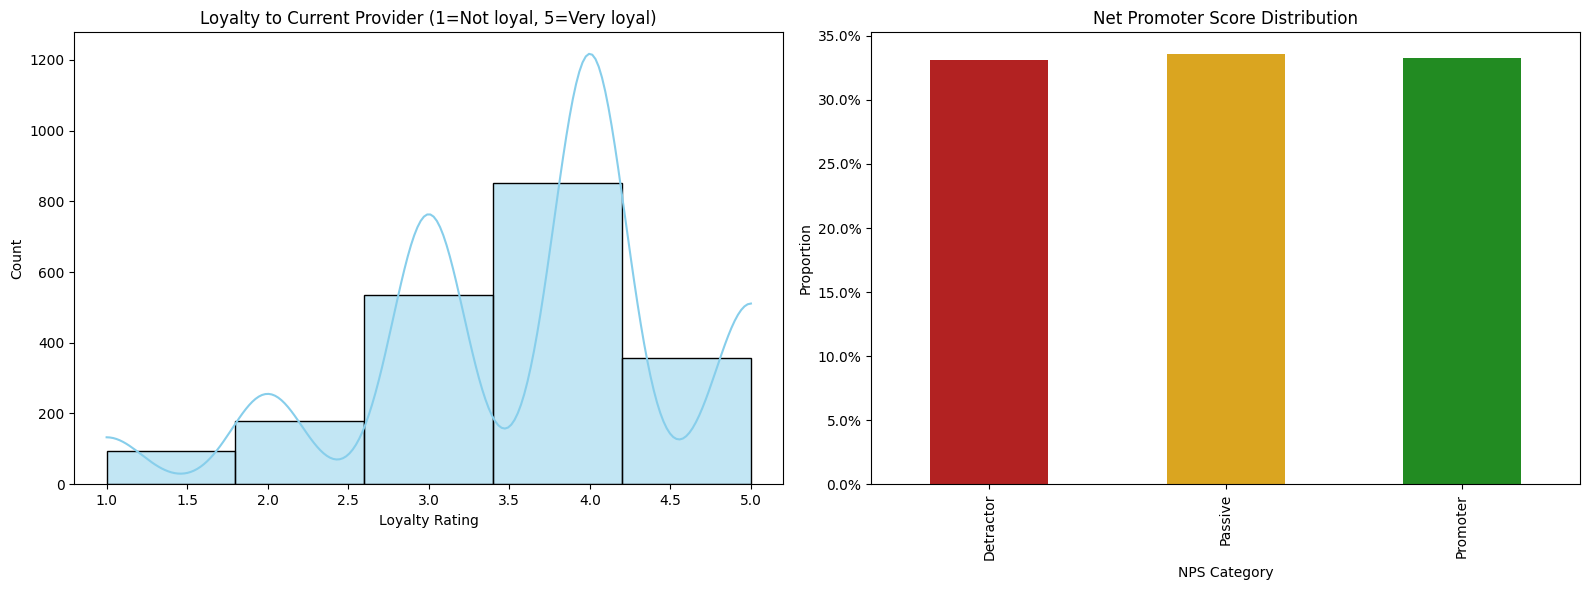

Net Promoter Score: 0.1


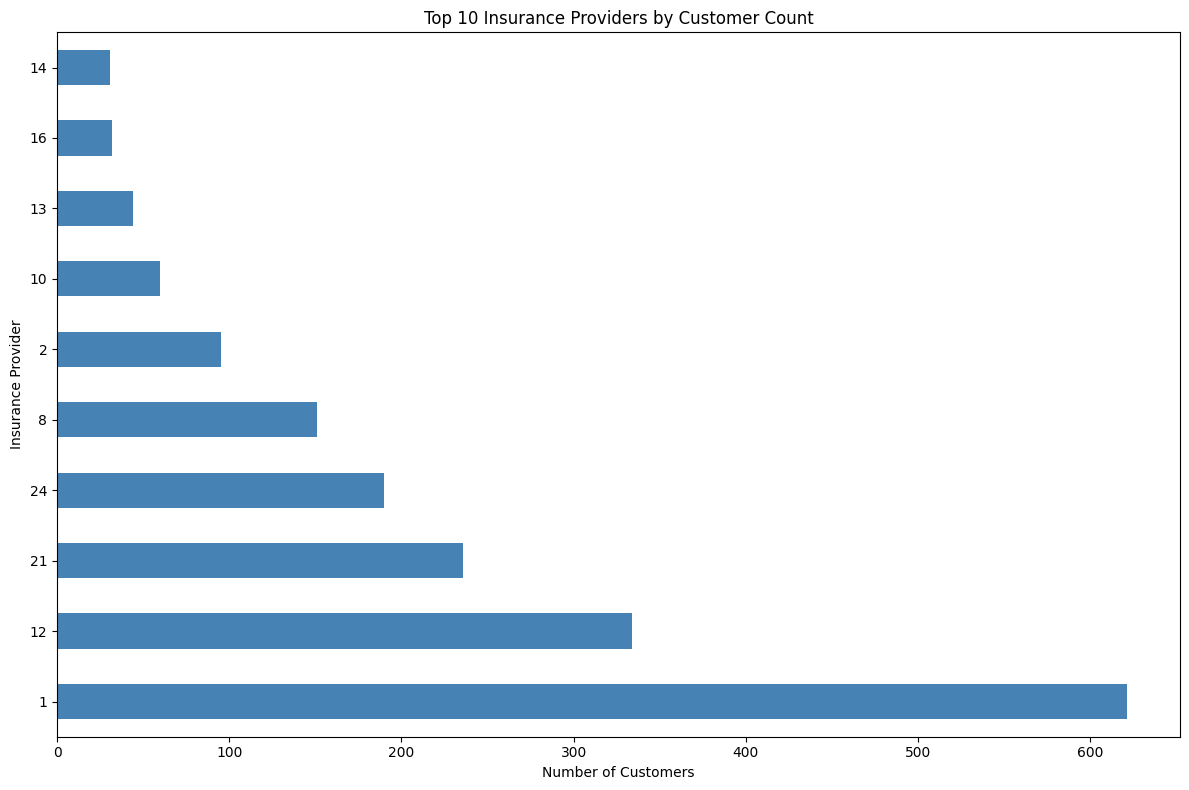

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Load data
codebook = pd.read_excel(os.path.join(base_path, '230807_Survey.xlsx'), sheet_name='Codebook')
responses = pd.read_excel(os.path.join(base_path, '230807_Survey.xlsx'), sheet_name='Result')

# Translation dictionaries
demographic_translation = {
    'Q1': {
        'name': 'Gender',
        'values': {
            1: 'Male',
            2: 'Female',
            3: 'Other',
            4: 'Prefer not to say'
        }
    },
    'Q3': {
        'name': 'Age_Group',
        'values': {
            1: '18-24 years',
            2: '25-34 years',
            3: '35-44 years',
            4: '45-54 years',
            5: '55-64 years',
            6: '65+ years'
        }
    },
    'Q5': {
        'name': 'Insurance_Type',
        'values': {
            1: 'Statutory health insurance',
            2: 'Private health insurance',
            3: 'None',
            4: "Don't know"
        }
    },
    'Q6': {
        'name': 'Income',
        'values': {
            1: 'Under €40,000',
            2: '€40,000-€66,599',
            3: '€66,600-€92,999',
            4: '€93,000-€113,999',
            5: '€114,000+',
            6: 'No answer'
        }
    }
}

churn_translation = {
    'Q16': {
        'name': 'Planned_Switch_6mo',
        'values': {
            1: 'Already decided to switch',
            2: 'Comparing options',
            3: 'Want to switch but not informed',
            4: 'Unsure about switching',
            5: 'No plans to switch'
        }
    },
    'Q17': {
        'name': 'Switch_Readiness',
        'values': {
            1: 'Ready to switch',
            2: 'Not ready to switch'
        }
    },
    'Q18': {
        'name': 'Switch_History',
        'values': {
            1: 'Switched in last 10y',
            2: 'Considered switching',
            3: 'Never considered switching'
        }
    }
}

# Translate demographic columns
for col, trans in demographic_translation.items():
    if col in responses:
        responses[trans['name']] = responses[col].map(trans['values'])
        
# Translate churn columns
for col, trans in churn_translation.items():
    if col in responses:
        responses[trans['name']] = responses[col].map(trans['values'])

# Calculate churn metrics
responses['Switching_Risk'] = responses['Q17'].apply(
    lambda x: 'High Risk' if x == 1 else ('Medium Risk' if x == 2 else 'Low Risk')
)

# 1. Switching intention analysis
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=responses, 
    x='Planned_Switch_6mo', 
    order=responses['Planned_Switch_6mo'].value_counts().index,
    palette='viridis'
)
plt.title('Planned Insurance Switching in Next 6 Months')
plt.xlabel('Switching Plans')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(PercentFormatter(len(responses)))
plt.tight_layout()
plt.show()

# 2. Churn by demographic factors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
demographic_factors = ['Gender', 'Age_Group', 'Income', 'Insurance_Type']

for i, factor in enumerate(demographic_factors):
    ax = axes[i//2, i%2]
    churn_by_factor = responses.groupby(factor)['Switch_Readiness'].value_counts(
        normalize=True).unstack().fillna(0)
    churn_by_factor.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')
    ax.set_title(f'Switching Readiness by {factor}')
    ax.set_ylabel('Proportion')
    ax.legend(title='Ready to Switch?', loc='upper right')
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 3. Switching reasons analysis
reasons_columns = [f'Q24.{i}' for i in range(1, 10)]
reason_labels = [
    'Life changes',
    'Bad experiences',
    'Costs',
    'Sales contact',
    'Advertising',
    'Recommendations',
    'Media info',
    'Reputation',
    'Other'
]

switch_reasons = responses[reasons_columns].mean().sort_values(ascending=False)
switch_reasons.index = reason_labels

plt.figure(figsize=(12, 8))
switch_reasons.plot(kind='barh', color='teal')
plt.title('Top Reasons for Considering Insurance Switch')
plt.xlabel('Proportion of Respondents')
plt.ylabel('Reason')
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.tight_layout()
plt.show()

# 4. Barriers to switching analysis
barrier_columns = [f'Q55.{i}' for i in range(1, 14)]
barrier_labels = [
    'Loyalty to current insurer',
    'Fear of losing benefits',
    'Complex process',
    'Time required',
    'Unclear costs',
    'Lack of personal advice',
    'Family objections',
    'Difficulty comparing offers',
    'Fear of coverage gap',
    'Fear of worse service',
    'Indifference',
    'No better options',
    'Too much bureaucracy'
]

barriers = responses[barrier_columns].mean().sort_values(ascending=False)
barriers.index = barrier_labels

plt.figure(figsize=(12, 8))
barriers.plot(kind='barh', color='purple')
plt.title('Top Barriers to Switching Insurance Providers')
plt.xlabel('Proportion of Respondents')
plt.ylabel('Barrier')
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.tight_layout()
plt.show()

# 5. Loyalty and retention analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Loyalty distribution
sns.histplot(responses['Q41'], bins=5, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Loyalty to Current Provider (1=Not loyal, 5=Very loyal)')
ax1.set_xlabel('Loyalty Rating')
ax1.set_ylabel('Count')

# NPS calculation
def categorize_nps(score):
    if score >= 9: return 'Promoter'
    elif score >= 7: return 'Passive'
    else: return 'Detractor'

responses['NPS_Category'] = responses['Q42'].apply(categorize_nps)
nps_distribution = responses['NPS_Category'].value_counts(normalize=True).loc[['Detractor', 'Passive', 'Promoter']]

nps_distribution.plot(kind='bar', color=['firebrick', 'goldenrod', 'forestgreen'], ax=ax2)
ax2.set_title('Net Promoter Score Distribution')
ax2.set_xlabel('NPS Category')
ax2.set_ylabel('Proportion')
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.tight_layout()
plt.show()

# Calculate actual NPS
nps = (responses['NPS_Category'].value_counts().get('Promoter', 0) - 
       responses['NPS_Category'].value_counts().get('Detractor', 0)) / len(responses) * 100
print(f"Net Promoter Score: {nps:.1f}")

# 6. Provider performance comparison
provider_ratings = responses['Q9'].value_counts().head(10)
plt.figure(figsize=(12, 8))
provider_ratings.plot(kind='barh', color='steelblue')
plt.title('Top 10 Insurance Providers by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('Insurance Provider')
plt.tight_layout()
plt.show()